In [19]:
from itertools import groupby
from os.path import exists

import matplotlib.pyplot as plt
import numpy as np
import yaml




In [2]:
with open('../config.yml', 'r') as ymlfile:
    config = yaml.safe_load(ymlfile)
    data = config['data']



In [3]:
for data_name in ['454', 'Illumina']:
    fastq_file = open('../data/' + data_name + '.fastq', 'r')

    count = 0
    # Strips the newline character
    read_lengths = []
    counter = 0
    line = fastq_file.readline()
    while line:
        if counter % 4 == 1:
            read_lengths.append(len(line))
        counter += 1
        line = fastq_file.readline()

    print('from file:', data_name + '.fastq')
    print('number of reads:', len(read_lengths))
    print('mean read length: ', np.mean(read_lengths))
    print('std read length: ', np.std(read_lengths))
    print('max read length: ', max(read_lengths))
    print('min read length: ', min(read_lengths))



from file: 454.fastq
number of reads: 188176
mean read length:  500.09891803418077
std read length:  82.15693521143405
max read length:  1007
min read length:  38
from file: Illumina.fastq
number of reads: 1429988
mean read length:  216.40433695947098
std read length:  56.58643809996435
max read length:  252
min read length:  33


In [4]:
region_matrix = [[790 - 1, 1186],  # 0 : p17
                 [1186 - 1, 1879],  # 1 : p24
                 [1879 - 1, 2292],  # 2 : p2p6
                 [2253 - 1, 2550],  # 3 : PR
                 [2550 - 1, 3870],  # 4 : RT
                 [3870 - 1, 4230],  # 5 : RNase
                 [4230 - 1, 5096],  # 6 : int
                 [5041 - 1, 5620],  # 7 : vif
                 [5559 - 1, 5850],  # 8 : vpr
                 [6062 - 1, 6310],  # 9 : vpu
                 [6225 - 1, 7758],  # 10 : gp120
                 [7758 - 1, 8795],  # 11 : gp41
                 [8797 - 1, 9417]]  # 12 : nef


def check_in_which_genes(start, stop):
    started = False if start > region_matrix[0][0] else True
    region_indexes = []
    for region_index, region in enumerate(region_matrix):
        if started:
            region_indexes.append(region_index)
            if stop <= region[1]:
                if region_index + 1 < 13 and region_matrix[region_index + 1][0] < stop < region_matrix[region_index + 1][1]:
                    region_indexes.append(region_index + 1)
                break
        if not started and region[0] <= start <= region[1]:

            region_indexes.append(region_index)
            started = True
            if stop <= region[1]:
                if region_index + 1 < 13 and region_matrix[region_index + 1][0] < stop < region_matrix[region_index + 1][1]:
                    region_indexes.append(region_index + 1)
                break
    return region_indexes

from file: ./data/Illumina_mapped.sam
number of reads: 173915
mean read length:  515.9305982807693
std read length:  22.91951424388577
max read length:  706
min read length:  301
[12282, 19271, 14715, 12100, 25701, 11858, 28358, 26381, 19080, 13402, 36111, 31055, 30257]
from file: ./data/Illumina_mapped.sam
number of reads: 1157783
mean read length:  236.89768462656647
std read length:  26.626061037662897
max read length:  251
min read length:  151
[84612, 124326, 100183, 108004, 322907, 126646, 168732, 77257, 61834, 70104, 146382, 131404, 51577]


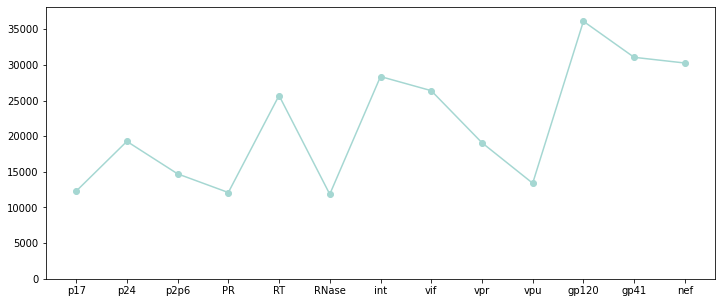

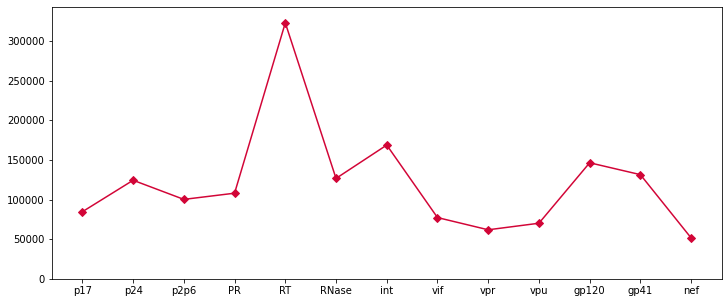

[[12282, 19271, 14715, 12100, 25701, 11858, 28358, 26381, 19080, 13402, 36111, 31055, 30257], [84612, 124326, 100183, 108004, 322907, 126646, 168732, 77257, 61834, 70104, 146382, 131404, 51577]]


In [5]:
number_of_reads_per_gene_per_NGS = []
gene_names = ['p17', 'p24', 'p2p6', 'PR', 'RT', 'RNase', 'int', 'vif', 'vpr', 'vpu', 'gp120', 'gp41', 'nef']

for data_name in ['454', 'Illumina']:
    sam_file = open('../data/'+ data_name+ '_mapped.sam', 'r')
    number_of_reads_per_gene = [0 for _ in range(13)]
    read_lengths = []
    counter = 0
    line = sam_file.readline()
    while line:
        read_lengths.append(len(line.split('\t')[9]))
        position = int(line.split('\t')[3])
        indexes = check_in_which_genes(int(line.split('\t')[3]), int(line.split('\t')[3]) + read_lengths[-1])
        for index in indexes:
            number_of_reads_per_gene[index] += 1
        line = sam_file.readline()

    print('from file:', config[data]['reads_path'] + '_mapped.sam')
    print('number of reads:', len(read_lengths))
    print('mean read length: ', np.mean(read_lengths))
    print('std read length: ', np.std(read_lengths))
    print('max read length: ', max(read_lengths))
    print('min read length: ', min(read_lengths))
    print(number_of_reads_per_gene)

    number_of_reads_per_gene_per_NGS.append(number_of_reads_per_gene)
    plt.figure(figsize=(12,5))
    # plt.scatter(gene_names, number_of_reads_per_gene_per_NGS[0])
    # plt.plot(gene_names,number_of_reads_per_gene_per_NGS[0], '-o', color="#A5D7D2")

    if data_name == 'Illumina':
        plt.plot(gene_names,number_of_reads_per_gene, '-D', color="#D20537")
        plt.ylim([0,max(number_of_reads_per_gene)+20000])

    else:
        plt.plot(gene_names,number_of_reads_per_gene, '-o', color="#A5D7D2")
        plt.ylim([0,max(number_of_reads_per_gene)+2000])
    # ax.spines["top"].set_visible(False)
    # ax.spines["right"].set_visible(False)
    # ax.spines["left"].set_visible(False)



plt.show()
print(number_of_reads_per_gene_per_NGS)


percentage_454: [4.3775015949617035, 6.8684931799793985, 5.244661779014938, 4.312633878768654, 9.160248208118444, 4.226381201193281, 10.107245581332354, 9.402611103784782, 6.800417719579001, 4.776687540765082, 12.870539007951642, 11.068499595467813, 10.784079609082905]
percentage_illumina: [5.375712848037571, 7.898889939312616, 6.364995984670591, 6.86189299909528, 20.51547426631291, 8.046288107509174, 10.720167119026563, 4.90842253463857, 3.9285423845974, 4.453966027263578, 9.300189076270927, 8.348581419698494, 3.2768772935663244]


<Figure size 864x360 with 0 Axes>

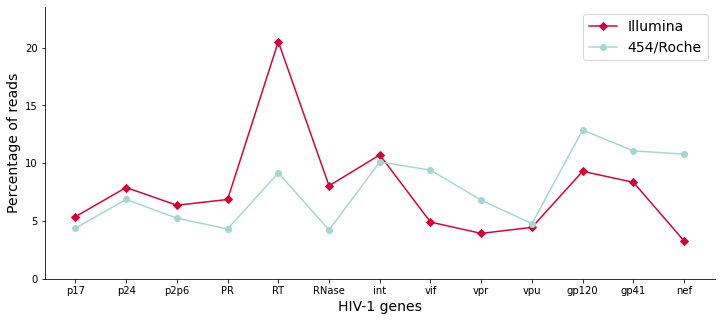

In [6]:
gene_names = ['p17', 'p24', 'p2p6', 'PR', 'RT', 'RNase', 'int', 'vif', 'vpr', 'vpu', 'gp120', 'gp41', 'nef']
# plt.scatter(gene_names, number_of_reads_per_gene_per_NGS[0])
percentage_454 = list(map(lambda x: x/sum(number_of_reads_per_gene_per_NGS[0]) * 100, number_of_reads_per_gene_per_NGS[0]))
percentage_illumina = list(map(lambda x: x/sum(number_of_reads_per_gene_per_NGS[1]) * 100, number_of_reads_per_gene_per_NGS[1]))
print('percentage_454:', percentage_454)

print('percentage_illumina:', percentage_illumina)
plt.figure(figsize=(12,5))

fig, ax = plt.subplots(figsize=(12,5))

ax.plot(gene_names,percentage_illumina, '-D', color="#D20537", label ='Illumina')
ax.plot(gene_names,percentage_454, '-o', color="#A5D7D2", label ='454/Roche')

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.legend(fontsize=14)
# ax.spines["left"].set_visible(False)
#

plt.ylim([0,max([*percentage_illumina, *percentage_454])+3])
plt.rcParams.update({'font.size': 12})
plt.ylabel('Percentage of reads',fontsize=14)
plt.xlabel('HIV-1 genes',fontsize=14)
plt.show()


454
25000
50000
75000
100000
125000
150000
9721
Illumina
25000
50000
75000
100000
125000
150000
175000
200000
225000
250000
275000
300000
325000
350000
375000
400000
425000
450000
475000
500000
525000
550000
575000
600000
625000
650000
675000
700000
725000
750000
775000
800000
825000
850000
875000
900000
925000
950000
975000
1000000
1025000
1050000
1075000
1100000
1125000
1150000
9721
[[75.53749614237219, 73.6858347906594, 71.82388643143709, 69.44758769673902, 67.06100195453143, 64.75671227239997, 61.96893323732127, 59.40746836745191, 56.90772554263964, 54.161094537599006, 51.41446353255837, 48.65754552000823, 45.80804443987244, 43.256866577512604, 40.13990330212941, 37.3418372595412, 34.67750231457669, 32.0954634296883, 29.513424544799914, 27.270856907725545, 24.966567225594076, 22.78572163357679, 20.913486266844973, 18.83551074992285, 16.829544285567327, 15.091040016459212, 13.589136920069953, 11.86091965847135, 10.410451599629669, 8.970270548297501, 7.6843946096080655, 6.41909268593

<Figure size 864x360 with 0 Axes>

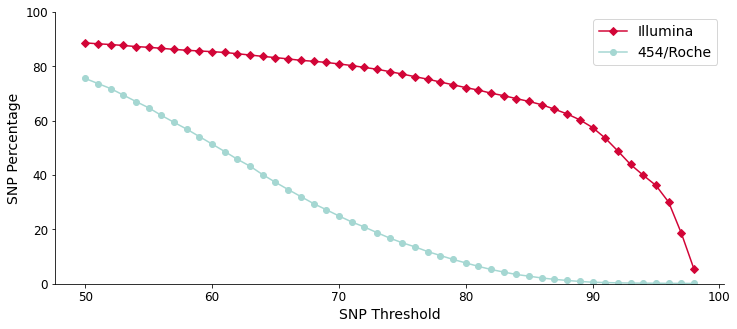

In [21]:


def switcher(base):
    return {
        'A': 0,
        'C': 1,
        'G': 2,
        'T': 3
    }.get(base, -1)


ratio_per_NGS = []
for data_name in ['454', 'Illumina']:
    print(data_name)
    if not exists('../data/'+ data_name + '_SNP_pos.npy'):
        sam_file = open('../data/'+ data_name + '_mapped.sam', 'r')
        number_of_reads = len(sam_file.readlines())
        base_count = np.zeros((9721, 4))
        sam_file = open('../data/'+ data_name + '_mapped.sam', 'r')
        line = sam_file.readline()
        counter = 1
        while line:
            read = line.split('\t')[9]
            cigar = line.split('\t')[5]
            adjusted_read = ''
            if 'I' in cigar or 'D' in cigar or 'S' in cigar:
                cigar_position = 0
                cigar_list = [''.join(g) for _, g in groupby(cigar, str.isalpha)]
                # delete insertions and add - for deletion
                for index in range(0, len(cigar_list), 2):
                    if cigar_list[index + 1] == 'S':
                        if int(cigar_list[index]) > 4:
                            continue
                    if cigar_list[index + 1] == 'D':
                        adjusted_read += '-' * int(cigar_list[index])
                    elif cigar_list[index + 1] != 'I':
                        adjusted_read += read[cigar_position:(cigar_position + int(cigar_list[index]))]
                        cigar_position += int(cigar_list[index])
            else:
                adjusted_read = read
            pos = int(line.split('\t')[3])
            for index, base in enumerate(adjusted_read):
                base_count[pos + index][switcher(base)] += 1 # base_count[pos + index][switcher(base)] + 1

            line = sam_file.readline()
            counter +=1
            if counter%25000 == 0:
                print(counter)

        # TODO save numpy file
        np.save('../data/'+ data_name + '_SNP_pos', base_count)
    else:
        base_count = np.load('../data/'+ data_name + '_SNP_pos.npy')
        print('loaded')

    # print(base_count)

    SNPs = []
    ratio=[]
    number_of_SNPs = []
    number_of_no_SNPs = []
    print(len(base_count))
    thresholds = range(50,99)
    for threshold in thresholds:
        for index in range(base_count.shape[0]):
            if np.sum(base_count[index]) > 1000:
                if np.max(base_count[index])/np.sum(base_count[index]) > threshold/100:
                    # print(np.max(base_count[index])/np.sum(base_count[index]))
                    SNPs.append(index)

        # print('threshold: ' +  str(threshold)+'%' )
        # print('SNPs:', len(SNPs))
        # print('SNPs/len(haplotype) * 100:', len(SNPs)/9721* 100)
        number_of_SNPs.append(len(SNPs))
        ratio.append(len(SNPs)/9721 * 100)
        SNPs = []
    ratio_per_NGS.append(ratio)
print(ratio_per_NGS)
plt.figure(figsize=(12,5))

fig, ax = plt.subplots(figsize=(12,5))
ratio_454 = ratio_per_NGS[0]
ratio_illumina = ratio_per_NGS[1]

ax.plot(thresholds,ratio_illumina, '-D', color="#D20537", label ='Illumina')
ax.plot(thresholds,ratio_454, '-o', color="#A5D7D2", label ='454/Roche')

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.legend(fontsize=14)
#
print(number_of_SNPs)
plt.ylim([0,100])
plt.rcParams.update({'font.size': 12})
plt.xlabel('SNP Threshold',fontsize=14)
plt.ylabel('SNP Percentage',fontsize=14)
plt.show()

454
loaded
9721
[1.0, 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09, 1.1, 1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2, 1.21, 1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3, 1.31, 1.32, 1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4, 1.41, 1.42, 1.43, 1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.5, 1.51, 1.52, 1.53, 1.54, 1.55, 1.56, 1.57, 1.58, 1.59, 1.6, 1.61, 1.62, 1.63, 1.64, 1.65, 1.66, 1.67, 1.68, 1.69, 1.7, 1.71, 1.72, 1.73, 1.74, 1.75, 1.76, 1.77, 1.78, 1.79, 1.8, 1.81, 1.82, 1.83, 1.84, 1.85, 1.86, 1.87, 1.88, 1.89, 1.9, 1.91, 1.92, 1.93, 1.94, 1.95, 1.96, 1.97, 1.98, 1.99]


<ipython-input-37-945301b487cb>:71: RuntimeWarning: divide by zero encountered in log2
  sum -= p * np.log2(p)
<ipython-input-37-945301b487cb>:71: RuntimeWarning: invalid value encountered in double_scalars
  sum -= p * np.log2(p)


Illumina
loaded
9721
[1.0, 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09, 1.1, 1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2, 1.21, 1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3, 1.31, 1.32, 1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4, 1.41, 1.42, 1.43, 1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.5, 1.51, 1.52, 1.53, 1.54, 1.55, 1.56, 1.57, 1.58, 1.59, 1.6, 1.61, 1.62, 1.63, 1.64, 1.65, 1.66, 1.67, 1.68, 1.69, 1.7, 1.71, 1.72, 1.73, 1.74, 1.75, 1.76, 1.77, 1.78, 1.79, 1.8, 1.81, 1.82, 1.83, 1.84, 1.85, 1.86, 1.87, 1.88, 1.89, 1.9, 1.91, 1.92, 1.93, 1.94, 1.95, 1.96, 1.97, 1.98, 1.99]
[]


<Figure size 864x360 with 0 Axes>

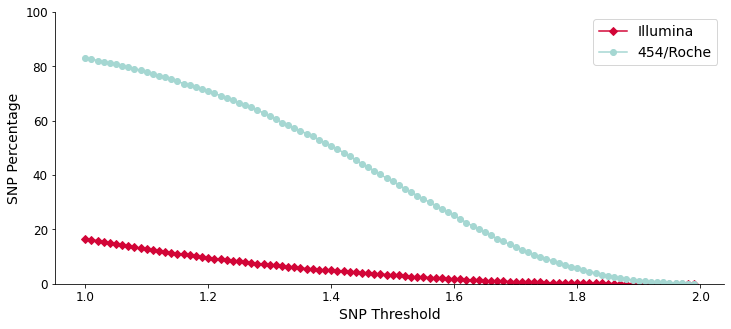

In [37]:


def switcher(base):
    return {
        'A': 0,
        'C': 1,
        'G': 2,
        'T': 3
    }.get(base, -1)


ratio_per_NGS = []
for data_name in ['454', 'Illumina']:
    print(data_name)
    if not exists('../data/'+ data_name + '_SNP_pos.npy'):
        sam_file = open('../data/'+ data_name + '_mapped.sam', 'r')
        number_of_reads = len(sam_file.readlines())
        base_count = np.zeros((9721, 4))
        sam_file = open('../data/'+ data_name + '_mapped.sam', 'r')
        line = sam_file.readline()

        counter = 1
        while line:
             # NEW
            read = line.split('\t')[9]
            cigar = line.split('\t')[5]
            adjusted_read = ''
            if 'I' in cigar or 'D' in cigar or 'S' in cigar:
                cigar_position = 0
                cigar_list = [''.join(g) for _, g in groupby(cigar, str.isalpha)]
                # delete insertions and add - for deletion
                for index in range(0, len(cigar_list), 2):
                    if cigar_list[index + 1] == 'S':
                        if int(cigar_list[index]) > 4:
                            continue
                    if cigar_list[index + 1] == 'D':
                        adjusted_read += '-' * int(cigar_list[index])
                    elif cigar_list[index + 1] != 'I':
                        adjusted_read += read[cigar_position:(cigar_position + int(cigar_list[index]))]
                        cigar_position += int(cigar_list[index])
            else:
                adjusted_read = read
            pos = int(line.split('\t')[3])
            for index, base in enumerate(adjusted_read):
                base_count[pos + index][switcher(base)] += 1 # base_count[pos + index][switcher(base)] + 1

            line = sam_file.readline()
            counter +=1
            if counter%25000 == 0:
                print(counter)

        # TODO save numpy file
        np.save('../data/'+ data_name + '_SNP_pos', base_count)
    else:
        base_count = np.load('../data/'+ data_name + '_SNP_pos.npy')
        print('loaded')

    # print(base_count)
    result = []
    SNPs = []
    ratio=[]
    number_of_SNPs = []
    number_of_no_SNPs = []
    print(len(base_count))
    thresholds = [x/100 for x in range(100,200)]
    for threshold in thresholds:
        for index in range(base_count.shape[0]):
            if np.sum(base_count[index]) > 1000:
                sum = 0
                for i in range(4):
                    p = (base_count[index][i])/np.sum(base_count[index])
                    sum -= p * np.log2(p)
                if sum > threshold:
                    # print(sum, base_count[index])
                    SNPs.append(index)
                # if(sum > -0.1):
                #     print('-0.1',base_count[index])
                # if(p * np.log2(p) < -0.5):
                #     print(p * np.log2(p))
                #     print('-0.5',base_count[index])
                # if np.max(base_count[index])/np.sum(base_count[index]) > threshold/100:
                #     # print(np.max(base_count[index])/np.sum(base_count[index]))
                #     SNPs.append(index)

        # print('threshold: ' +  str(threshold)+'%' )
        # print('SNPs:', len(SNPs))
        # print('SNPs/len(haplotype) * 100:', len(SNPs)/9721* 100)
#         number_of_SNPs.append(len(SNPs))
#         print(threshold,len(SNPs))
        ratio.append(len(SNPs)/9721 * 100)
        SNPs = []
#         no_SNPs = []
    ratio_per_NGS.append(ratio)
# print(ratio_per_NGS)
plt.figure(figsize=(12,5))

fig, ax = plt.subplots(figsize=(12,5))
ratio_454 = ratio_per_NGS[0]
ratio_illumina = ratio_per_NGS[1]

ax.plot(thresholds,ratio_illumina, '-D', color="#D20537", label ='Illumina')
ax.plot(thresholds,ratio_454, '-o', color="#A5D7D2", label ='454/Roche')

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.legend(fontsize=14)
#
print(number_of_SNPs)
plt.ylim([0,100])
plt.rcParams.update({'font.size': 12})
plt.xlabel('SNP Threshold',fontsize=14)
plt.ylabel('SNP Percentage',fontsize=14)
plt.show()

In [31]:
thresholds = [x/100 for x in range(190,200)]
print(thresholds)

[1.9, 1.91, 1.92, 1.93, 1.94, 1.95, 1.96, 1.97, 1.98, 1.99]
